In [1]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def calc_first_order(a, g, x) :
    return list(g/a*(1- math.exp(-1*a*t)) for t in x)

def calc_second_order(a, g, x) :
    return list(math.sqrt(g/a)*math.tanh(math.sqrt(a*g)*t) for t in x)

In [3]:
def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))

    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
                        break
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

In [15]:
times_list, vys_list, density_list = load_files('result_T', 'T', 2000)

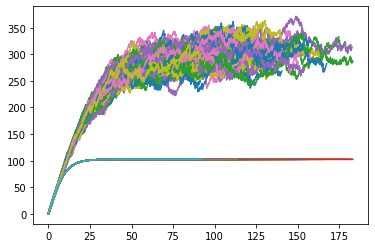

In [16]:
for times, vys in zip(times_list, vys_list) :
    plt.plot(times, vys)
#     plt.plot(times, calc_first_order(0.085, 10, times))
    plt.plot(times, calc_second_order(0.00095, 10, times)) 

In [17]:
# How to determining terminal velocity
terminal_vs = []
for times, vys in zip (times_list, vys_list) :
    if len(vys) > 0 :
        terminal_vs.append(sum(vys[-1000:])/1000)
terminal_v = sum(terminal_vs)/len(terminal_vs)
print("terminal velocity is {}".format(terminal_v) )

terminal velocity is 301.83465348423425


In [18]:
# How to set the determining 
def get_gamma_by_first_order(g, terminal_v) :
    return g/terminal_v

def get_gamma_by_second_order(g, terminal_v) :
    return g/(terminal_v**2)

In [19]:
g = 10
gamma_1 = get_gamma_by_first_order(g, terminal_v)
gamma_2 = get_gamma_by_second_order(g, terminal_v)
print("damping factor gamma in the first order situation : {}".format(gamma_1))
print("damping factor gamma in the second order situation : {}".format(gamma_2))

damping factor gamma in the first order situation : 0.033130722018047974
damping factor gamma in the second order situation : 0.00010976447414371687


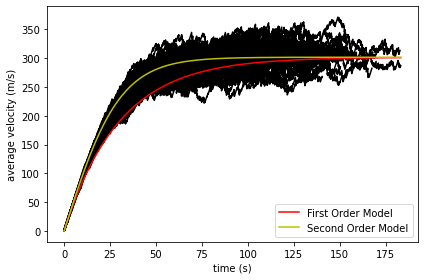

In [20]:
longest_times = []
for times, vys in zip(times_list, vys_list) :
    plt.plot(times, vys, 'k')
    if len(longest_times) < len(times) :
        longest_times = times
plt.plot(longest_times, calc_first_order(gamma_1, g, longest_times), 'r-', label='First Order Model')
plt.plot(longest_times, calc_second_order(gamma_2, g, longest_times), 'y-', label='Second Order Model')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("average velocity (m/s)")
plt.tight_layout()
plt.savefig("curvefittingcompare.jpg")

In [21]:
import numpy as np
sqrt_error_first_order = 0.0
sqrt_error_second_order = 0.0
for times, vys in zip(times_list, vys_list) :    
    if len(times) > 0 :
        sqrt_error_first_order += np.sqrt(sum((np.array(vys) - np.array(calc_first_order(gamma_1, g, times)))**2)/len(times))
        sqrt_error_second_order += np.sqrt(sum((np.array(vys) - np.array(calc_second_order(gamma_2, g, times)))**2)/len(times)) 
    
print("The Mean Square Root Error of First Order Model : {}".format(sqrt_error_first_order/len(vys_list)))
print("The Mean Square Root Error of Second Order Model : {}".format(sqrt_error_second_order/len(vys_list)))
if sqrt_error_first_order < sqrt_error_second_order :
    print("The first order model is more fitter than the second order model")
else :
    print("The second order model is more fitter than the first order model")

The Mean Square Root Error of First Order Model : 24.785426245489607
The Mean Square Root Error of Second Order Model : 16.844684793576494
The second order model is more fitter than the first order model


# Density & Final Velocity

average terminal velocity :  306.98164211559754
average density :  0.0010024782744662518


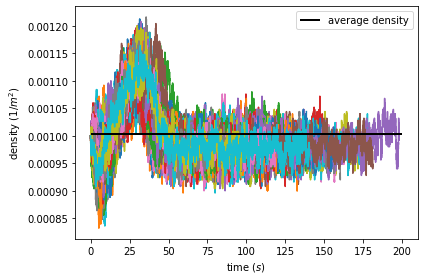

In [140]:
def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))
        elif variance == "RRR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))
        elif variance == "D" :
            files = list(filter( lambda x : float(float(x.split('_')[1])/(float(x.split('_')[2])*(float(x.split('_')[3]))))==float(value), files))

    
    
    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

dir_name = 'result_T'
variable = 'T'
value = '1000'

times_list, vys_list, density_list = load_files(dir_name, variable, value)

tot_average_vy_list = []
for times, vys in zip(times_list, vys_list) :
    tot_average_vy_list.extend(vys[-1000:])
    plt.plot(times, vys)
tot_average_vy = sum(tot_average_vy_list)/len(tot_average_vy_list)
print("average terminal velocity : ",tot_average_vy)
plt.hlines(y=tot_average_vy, xmin=0, xmax=200, linewidth=2, color='black',label = "average terminal velocity", zorder=13)
plt.legend()
plt.xlabel(r'time $(s)$')
plt.ylabel(r'average velocity $(m/s)$')
plt.tight_layout()
plt.savefig(variable+"_"+value+"_tvsvy.jpg")

plt.clf()
plt.cla()

tot_average_density_list = []

for times, density in zip(times_list, density_list) :
    tot_average_density_list.extend(density)
    plt.plot(times, density)
tot_average_density = sum(tot_average_density_list)/len(tot_average_density_list)
print("average density : ",tot_average_density)
plt.hlines(y=tot_average_density, xmin=0, xmax=200, linewidth=2, color='black',label = "average density", zorder=13)
plt.legend()
plt.xlabel(r'time $(s)$')
plt.ylabel(r'density $(1/m^2)$')
plt.tight_layout()
plt.savefig(variable+"_"+value+"density.jpg")


# Organized Script

In [100]:
def calc_first_order(a, g, x) :
    return list(g/a*(1- math.exp(-1*a*t)) for t in x)

def calc_second_order(a, g, x) :
    return list(math.sqrt(g/a)*math.tanh(math.sqrt(a*g)*t) for t in x)

def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))
        elif variance == "RRR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))
        elif variance == "D" :
            files = list(filter( lambda x : float(float(x.split('_')[1])/(float(x.split('_')[2])*(float(x.split('_')[3]))))==float(value), files))

    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

# How to set the determining 
def get_gamma_by_first_order(g, terminal_v) :
    return g/terminal_v

def get_gamma_by_second_order(g, terminal_v) :
    return g/(terminal_v**2)

In [101]:
def compare_models(dir_name, variable, value) :

    times_list, vys_list, density_list = load_files(dir_name, variable, value)
    
    terminal_vs = []
    for times, vys in zip (times_list, vys_list) :
        if len(vys) > 0 :
            terminal_vs.append(sum(vys[-1000:])/1000)
    print("number_of_logs : ",len(terminal_vs))
    if len(terminal_vs) > 0 :
        terminal_v = sum(terminal_vs)/len(terminal_vs)

        g = 10
        gamma_1 = get_gamma_by_first_order(g, terminal_v)
        gamma_2 = get_gamma_by_second_order(g, terminal_v)
        print("damping factor gamma in the first order situation : {}".format(gamma_1))
        print("damping factor gamma in the second order situation : {}".format(gamma_2))

        sqrt_error_first_order = 0.0
        sqrt_error_second_order = 0.0
        for times, vys in zip(times_list, vys_list) :    
            if (len(times) > 0 ) :
                sqrt_error_first_order += np.sqrt(sum((np.array(vys) - np.array(calc_first_order(gamma_1, g, times)))**2)/len(times))
                sqrt_error_second_order += np.sqrt(sum((np.array(vys) - np.array(calc_second_order(gamma_2, g, times)))**2)/len(times)) 

        print("The Mean Square Root Error of First Order Model : {}".format(sqrt_error_first_order/len(vys_list)))
        print("The Mean Square Root Error of Second Order Model : {}".format(sqrt_error_second_order/len(vys_list)))
        if sqrt_error_first_order < sqrt_error_second_order :
            print("The first order model is more fitter than the second order model")
        else :
            print("The second order model is more fitter than the first order model")

        return [gamma_1, gamma_2, terminal_v]
    else :
        return [None, None, None]

## Temperature

In [103]:
Ts_gamma1s = [] 
Ts_gamma2s = []
Ts_terminal_vs = []

Ts = list(map(lambda x : x*100,  range( 1, 100)))
for T in Ts :
    print(T)
    [Ts_g1, Ts_g2, Ts_terminal_v] = compare_models('result_T', 'T', T)
    print(Ts_g1)
    print(Ts_g2)
    Ts_gamma1s.append(Ts_g1)
    Ts_gamma2s.append(Ts_g2)
    Ts_terminal_vs.append(Ts_terminal_v)

100
number_of_logs :  100
damping factor gamma in the first order situation : 0.032452012645983304
damping factor gamma in the second order situation : 0.00010531331247750606
The Mean Square Root Error of First Order Model : 28.44706988288449
The Mean Square Root Error of Second Order Model : 15.472705815136822
The second order model is more fitter than the first order model
0.032452012645983304
0.00010531331247750606
200
number_of_logs :  100
damping factor gamma in the first order situation : 0.03229100098247664
damping factor gamma in the second order situation : 0.00010427087444503072
The Mean Square Root Error of First Order Model : 26.479983518671716
The Mean Square Root Error of Second Order Model : 15.49722754327668
The second order model is more fitter than the first order model
0.03229100098247664
0.00010427087444503072
300
number_of_logs :  100
damping factor gamma in the first order situation : 0.03288283768642047
damping factor gamma in the second order situation : 0.00010

number_of_logs :  100
damping factor gamma in the first order situation : 0.033225083986870935
damping factor gamma in the second order situation : 0.00011039062059346272
The Mean Square Root Error of First Order Model : 24.98592506390251
The Mean Square Root Error of Second Order Model : 16.816862949588067
The second order model is more fitter than the first order model
0.033225083986870935
0.00011039062059346272
2200
number_of_logs :  100
damping factor gamma in the first order situation : 0.03328428587512907
damping factor gamma in the second order situation : 0.00011078436862173165
The Mean Square Root Error of First Order Model : 25.56089642661547
The Mean Square Root Error of Second Order Model : 17.267451892621967
The second order model is more fitter than the first order model
0.03328428587512907
0.00011078436862173165
2300
number_of_logs :  100
damping factor gamma in the first order situation : 0.03310068695122706
damping factor gamma in the second order situation : 0.0001095

number_of_logs :  100
damping factor gamma in the first order situation : 0.03336899981434325
damping factor gamma in the second order situation : 0.00011134901486096398
The Mean Square Root Error of First Order Model : 23.565502076564165
The Mean Square Root Error of Second Order Model : 18.874480311480838
The second order model is more fitter than the first order model
0.03336899981434325
0.00011134901486096398
4200
number_of_logs :  100
damping factor gamma in the first order situation : 0.03364007038358918
damping factor gamma in the second order situation : 0.0001131654335412834
The Mean Square Root Error of First Order Model : 22.91681358001589
The Mean Square Root Error of Second Order Model : 18.61839951116492
The second order model is more fitter than the first order model
0.03364007038358918
0.0001131654335412834
4300
number_of_logs :  100
damping factor gamma in the first order situation : 0.03398794988135836
damping factor gamma in the second order situation : 0.00011551807

number_of_logs :  100
damping factor gamma in the first order situation : 0.03412361187223814
damping factor gamma in the second order situation : 0.00011644208872071518
The Mean Square Root Error of First Order Model : 22.332050671954963
The Mean Square Root Error of Second Order Model : 19.386399586598134
The second order model is more fitter than the first order model
0.03412361187223814
0.00011644208872071518
6200
number_of_logs :  100
damping factor gamma in the first order situation : 0.03442242751243809
damping factor gamma in the second order situation : 0.00011849035158490548
The Mean Square Root Error of First Order Model : 23.892894834584467
The Mean Square Root Error of Second Order Model : 19.676376846520046
The second order model is more fitter than the first order model
0.03442242751243809
0.00011849035158490548
6300
number_of_logs :  100
damping factor gamma in the first order situation : 0.03436944550718896
damping factor gamma in the second order situation : 0.0001181

number_of_logs :  100
damping factor gamma in the first order situation : 0.03484443129207902
damping factor gamma in the second order situation : 0.00012141343920684158
The Mean Square Root Error of First Order Model : 23.498907792820557
The Mean Square Root Error of Second Order Model : 19.332935054789985
The second order model is more fitter than the first order model
0.03484443129207902
0.00012141343920684158
8200
number_of_logs :  100
damping factor gamma in the first order situation : 0.035052269461157325
damping factor gamma in the second order situation : 0.00012286615943775826
The Mean Square Root Error of First Order Model : 23.257792590440282
The Mean Square Root Error of Second Order Model : 19.638287898847373
The second order model is more fitter than the first order model
0.035052269461157325
0.00012286615943775826
8300
number_of_logs :  100
damping factor gamma in the first order situation : 0.03482197547308642
damping factor gamma in the second order situation : 0.00012

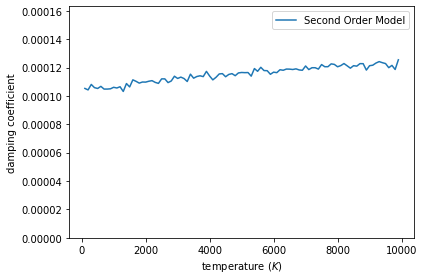

In [104]:
plt.plot(Ts, Ts_gamma2s, label='Second Order Model')
plt.legend()
plt.xlabel(r'temperature $(K)$')
plt.ylabel("damping coefficient")
y = Ts_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("damping coefficient_temperature.jpg")

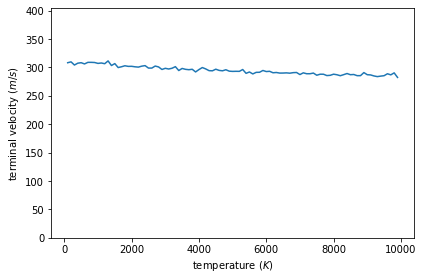

In [105]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(Ts, Ts_terminal_vs)
# plt.legend()
plt.xlabel(r'temperature $(K)$')
plt.ylabel(r'terminal velocity $(m/s)$')
y = Ts_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
# plt.ylim(0, max(Ts_terminal_vs)+max(Ts_terminal_vs)*0.30 if max(Ts_terminal_vs)-min(Ts_terminal_vs) < 0.1*max(Ts_terminal_vs) else max(Ts_terminal_vs))
# plt.ylim(0,max(terminal_vs)+max(terminal_vs)*0.30)
plt.tight_layout()
plt.savefig("terminal_velocity_temperature.jpg")


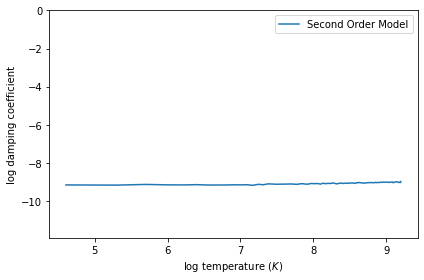

In [107]:
log_Ts = np.log(np.array(Ts))
log_Ts_gamma2s = np.log(np.array(Ts_gamma2s))
plt.plot(log_Ts, log_Ts_gamma2s, label='Second Order Model')
plt.legend()
plt.xlabel(r'log temperature $(K)$')
plt.ylabel("log damping coefficient")
y = log_Ts_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log damping coefficient_temperature.jpg")

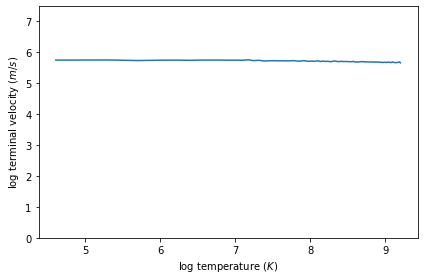

In [108]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_Ts = np.log(np.array(Ts))
log_Ts_terminal_vs = np.log(np.array(Ts_terminal_vs))
plt.plot(log_Ts, log_Ts_terminal_vs)
# plt.legend()
plt.xlabel(r'log temperature $(K)$')
plt.ylabel(r'log terminal velocity $(m/s)$')
y = log_Ts_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log terminal_velocity_temperature.jpg")


## Radius Ratio

In [71]:
RRs_gamma1s = [] 
RRs_gamma2s = []
RRs_terminal_vs = []

RRs = list(map(lambda x : x,  range( 4, 100)))
for RR in RRs :
    print(RR)
    [g1, g2, terminal_v] = compare_models('result_RR', 'RR', RR)
    print(g1)
    print(g2)
    RRs_gamma1s.append(g1)
    RRs_gamma2s.append(g2)
    RRs_terminal_vs.append(terminal_v)

# plt.plot(RRs, gamma1s, label='First Order Model')
# plt.plot(RRs, gamma2s, label='Second Order Model')
# plt.legend()
# plt.ylabel("damping coefficient")
# plt.xlabel("Radius Ratio")

4
number_of_logs :  100
damping factor gamma in the first order situation : 0.013266731078831364
damping factor gamma in the second order situation : 1.7600615351802998e-05
The Mean Square Root Error of First Order Model : 53.59512986241757
The Mean Square Root Error of Second Order Model : 59.63066776927971
The first order model is more fitter than the second order model
0.013266731078831364
1.7600615351802998e-05
5
number_of_logs :  100
damping factor gamma in the first order situation : 0.019231696850455334
damping factor gamma in the second order situation : 3.6985816374781353e-05
The Mean Square Root Error of First Order Model : 54.829586023772144
The Mean Square Root Error of Second Order Model : 24.187999740850742
The second order model is more fitter than the first order model
0.019231696850455334
3.6985816374781353e-05
6
number_of_logs :  100
damping factor gamma in the first order situation : 0.020296827360286523
damping factor gamma in the second order situation : 4.11961200

number_of_logs :  100
damping factor gamma in the first order situation : 0.05775279004940882
damping factor gamma in the second order situation : 0.0003335384758491095
The Mean Square Root Error of First Order Model : 15.657536238422567
The Mean Square Root Error of Second Order Model : 9.295378069433651
The second order model is more fitter than the first order model
0.05775279004940882
0.0003335384758491095
25
number_of_logs :  100
damping factor gamma in the first order situation : 0.05927852080107665
damping factor gamma in the second order situation : 0.00035139430283636774
The Mean Square Root Error of First Order Model : 15.297377760632067
The Mean Square Root Error of Second Order Model : 9.752966778738966
The second order model is more fitter than the first order model
0.05927852080107665
0.00035139430283636774
26
number_of_logs :  100
damping factor gamma in the first order situation : 0.061010804732079045
damping factor gamma in the second order situation : 0.00037223182940

number_of_logs :  100
damping factor gamma in the first order situation : 0.0810624417877498
damping factor gamma in the second order situation : 0.0006571119468592324
The Mean Square Root Error of First Order Model : 10.083516103432272
The Mean Square Root Error of Second Order Model : 7.541288242668019
The second order model is more fitter than the first order model
0.0810624417877498
0.0006571119468592324
45
number_of_logs :  100
damping factor gamma in the first order situation : 0.08321360298184524
damping factor gamma in the second order situation : 0.0006924503721220163
The Mean Square Root Error of First Order Model : 10.080901011543522
The Mean Square Root Error of Second Order Model : 7.448846821307955
The second order model is more fitter than the first order model
0.08321360298184524
0.0006924503721220163
46
number_of_logs :  100
damping factor gamma in the first order situation : 0.08376234403042881
damping factor gamma in the second order situation : 0.0007016130277471914

number_of_logs :  100
damping factor gamma in the first order situation : 0.10258775315413733
damping factor gamma in the second order situation : 0.0010524247097214215
The Mean Square Root Error of First Order Model : 8.223364066829653
The Mean Square Root Error of Second Order Model : 6.172776540437362
The second order model is more fitter than the first order model
0.10258775315413733
0.0010524247097214215
65
number_of_logs :  100
damping factor gamma in the first order situation : 0.10369505976676233
damping factor gamma in the second order situation : 0.0010752665420032412
The Mean Square Root Error of First Order Model : 7.962736815672162
The Mean Square Root Error of Second Order Model : 6.315352440528641
The second order model is more fitter than the first order model
0.10369505976676233
0.0010752665420032412
66
number_of_logs :  100
damping factor gamma in the first order situation : 0.10416737438735452
damping factor gamma in the second order situation : 0.0010850841886755282

number_of_logs :  100
damping factor gamma in the first order situation : 0.12098154392268173
damping factor gamma in the second order situation : 0.0014636533969915773
The Mean Square Root Error of First Order Model : 6.875581502637048
The Mean Square Root Error of Second Order Model : 5.69115947543892
The second order model is more fitter than the first order model
0.12098154392268173
0.0014636533969915773
85
number_of_logs :  100
damping factor gamma in the first order situation : 0.12256956584187706
damping factor gamma in the second order situation : 0.0015023298470666234
The Mean Square Root Error of First Order Model : 6.9862469775176965
The Mean Square Root Error of Second Order Model : 5.412635746949757
The second order model is more fitter than the first order model
0.12256956584187706
0.0015023298470666234
86
number_of_logs :  100
damping factor gamma in the first order situation : 0.12243930265460529
damping factor gamma in the second order situation : 0.0014991382834546034

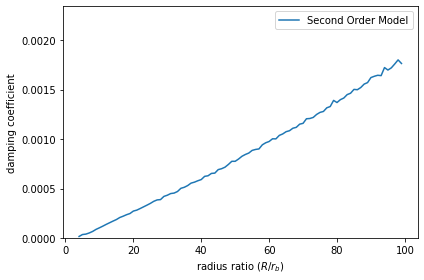

In [72]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRs, RRs_gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel(r'radius ratio $(R/r_b)$')
y = RRs_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("damping coefficient_radius.jpg")

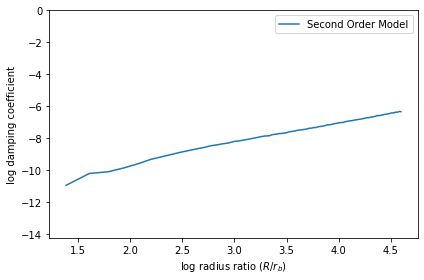

In [73]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_RRs = np.log(np.array(RRs))
log_RRs_gamma2s = np.log(np.array(RRs_gamma2s))
plt.plot(log_RRs, log_RRs_gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("log damping coefficient")
plt.xlabel(r'log radius ratio $(R/r_b)$')
y = log_RRs_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log damping coefficient_radius.jpg")

No handles with labels found to put in legend.


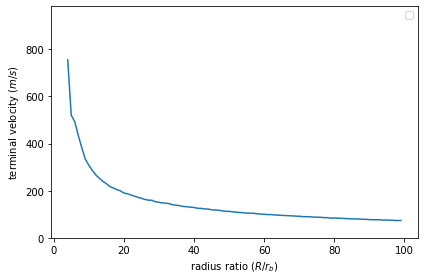

In [74]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRs, RRs_terminal_vs)
plt.ylabel(r'terminal velocity $(m/s)$')
plt.xlabel(r'radius ratio $(R/r_b)$')
y = RRs_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("terminal_velocity_radius.jpg")

No handles with labels found to put in legend.


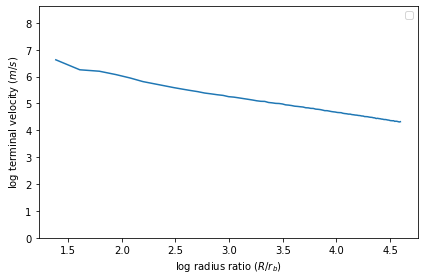

In [75]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_RRs = np.log(np.array(RRs))
log_RRs_terminal_vs = np.log(np.array(RRs_terminal_vs))
plt.plot(log_RRs, log_RRs_terminal_vs)
plt.ylabel(r'log terminal velocity $(m/s)$')
plt.xlabel(r'log radius ratio $(R/r_b)$')
y = log_RRs_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log terminal_velocity_radius.jpg")

## Reverse Radius

In [76]:
RRRs_gamma1s = [] 
RRRs_gamma2s = []
RRRs_terminal_vs = []

RRRs = list(map(lambda x : x,  range( 4, 100)))
for RRR in RRRs :
    print(RRR)
    [g1, g2, terminal_v] = compare_models('result_RRR', 'RRR', RRR)
    print(g1)
    print(g2)
    RRRs_gamma1s.append(g1)
    RRRs_gamma2s.append(g2)
    RRRs_terminal_vs.append(terminal_v)

# plt.plot(RRs, gamma1s, label='First Order Model')
# plt.plot(RRs, gamma2s, label='Second Order Model')
# plt.legend()
# plt.ylabel("damping coefficient")
# plt.xlabel("Radius Ratio")

4
number_of_logs :  100
damping factor gamma in the first order situation : 0.03245181707174632
damping factor gamma in the second order situation : 0.00010531204312580856
The Mean Square Root Error of First Order Model : 26.3281285886947
The Mean Square Root Error of Second Order Model : 17.164061450556353
The second order model is more fitter than the first order model
0.03245181707174632
0.00010531204312580856
5
number_of_logs :  100
damping factor gamma in the first order situation : 0.03291591530935722
damping factor gamma in the second order situation : 0.00010834574806527768
The Mean Square Root Error of First Order Model : 27.808688848134402
The Mean Square Root Error of Second Order Model : 16.076825148073638
The second order model is more fitter than the first order model
0.03291591530935722
0.00010834574806527768
6
number_of_logs :  100
damping factor gamma in the first order situation : 0.032411855512231365
damping factor gamma in the second order situation : 0.000105052837

number_of_logs :  100
damping factor gamma in the first order situation : 0.03255999837704611
damping factor gamma in the second order situation : 0.00010601534943132453
The Mean Square Root Error of First Order Model : 26.51722498197393
The Mean Square Root Error of Second Order Model : 15.952102874878939
The second order model is more fitter than the first order model
0.03255999837704611
0.00010601534943132453
25
number_of_logs :  100
damping factor gamma in the first order situation : 0.032166794487725484
damping factor gamma in the second order situation : 0.00010347026676155668
The Mean Square Root Error of First Order Model : 24.94213374820075
The Mean Square Root Error of Second Order Model : 17.136318041629337
The second order model is more fitter than the first order model
0.032166794487725484
0.00010347026676155668
26
number_of_logs :  100
damping factor gamma in the first order situation : 0.0326306523610344
damping factor gamma in the second order situation : 0.000106475947

number_of_logs :  100
damping factor gamma in the first order situation : 0.032621811320791345
damping factor gamma in the second order situation : 0.00010641825738493105
The Mean Square Root Error of First Order Model : 24.637940669797313
The Mean Square Root Error of Second Order Model : 16.63122407849072
The second order model is more fitter than the first order model
0.032621811320791345
0.00010641825738493105
45
number_of_logs :  100
damping factor gamma in the first order situation : 0.03254840213535094
damping factor gamma in the second order situation : 0.0001059398481564518
The Mean Square Root Error of First Order Model : 26.375456587188843
The Mean Square Root Error of Second Order Model : 16.8933623495419
The second order model is more fitter than the first order model
0.03254840213535094
0.0001059398481564518
46
number_of_logs :  100
damping factor gamma in the first order situation : 0.032473710293448255
damping factor gamma in the second order situation : 0.0001054541860

number_of_logs :  100
damping factor gamma in the first order situation : 0.03261077255645454
damping factor gamma in the second order situation : 0.00010634624867288085
The Mean Square Root Error of First Order Model : 25.823450354909355
The Mean Square Root Error of Second Order Model : 16.99392791454447
The second order model is more fitter than the first order model
0.03261077255645454
0.00010634624867288085
65
number_of_logs :  100
damping factor gamma in the first order situation : 0.03268171988041157
damping factor gamma in the second order situation : 0.00010680948143416886
The Mean Square Root Error of First Order Model : 26.276181596021946
The Mean Square Root Error of Second Order Model : 16.57067423304093
The second order model is more fitter than the first order model
0.03268171988041157
0.00010680948143416886
66
number_of_logs :  100
damping factor gamma in the first order situation : 0.0323969299538629
damping factor gamma in the second order situation : 0.00010495610704

number_of_logs :  100
damping factor gamma in the first order situation : 0.03261944372026592
damping factor gamma in the second order situation : 0.00010640281086195957
The Mean Square Root Error of First Order Model : 25.837729865224315
The Mean Square Root Error of Second Order Model : 17.264743141950643
The second order model is more fitter than the first order model
0.03261944372026592
0.00010640281086195957
85
number_of_logs :  100
damping factor gamma in the first order situation : 0.03267067258402351
damping factor gamma in the second order situation : 0.0001067372847092465
The Mean Square Root Error of First Order Model : 26.753737556807497
The Mean Square Root Error of Second Order Model : 17.249900225100372
The second order model is more fitter than the first order model
0.03267067258402351
0.0001067372847092465
86
number_of_logs :  100
damping factor gamma in the first order situation : 0.032453473861391226
damping factor gamma in the second order situation : 0.000105322796

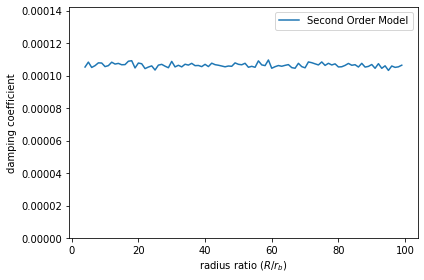

In [77]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRRs, RRRs_gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel(r'radius ratio $(R/r_b)$')
y = RRRs_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("damping_coefficient_reverse_radius.jpg")

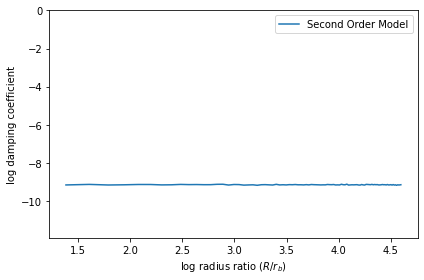

In [78]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_RRRs = np.log(np.array(RRRs))
log_RRRs_gamma2s = np.log(np.array(RRRs_gamma2s))
plt.plot(log_RRRs, log_RRRs_gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("log damping coefficient")
plt.xlabel(r'log radius ratio $(R/r_b)$')
y = log_RRRs_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log_damping_coefficient_reverse_radius.jpg")

No handles with labels found to put in legend.


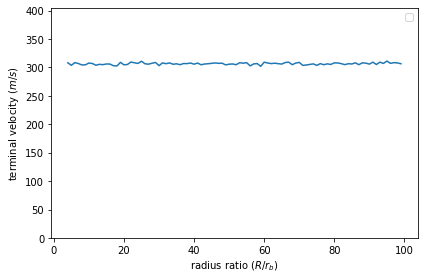

In [79]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRRs, RRRs_terminal_vs)
plt.legend()
plt.ylabel(r'terminal velocity $(m/s)$')
plt.xlabel(r'radius ratio $(R/r_b)$')
y = RRRs_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("terminal_velocity_reverse_radius.jpg")

No handles with labels found to put in legend.


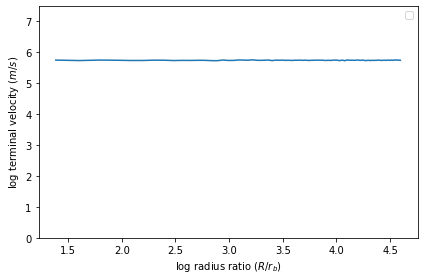

In [80]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_RRRs = np.log(np.array(RRRs))
log_RRRs_terminal_vs = np.log(np.array(RRRs_terminal_vs))
plt.plot(log_RRRs, log_RRRs_terminal_vs)
plt.legend()
plt.ylabel(r'log terminal velocity $(m/s)$')
plt.xlabel(r'log radius ratio $(R/r_b)$')
y = log_RRRs_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log_terminal_velocity_reverse_radius.jpg")

## Density 

In [111]:
Ds_gamma1s = [] 
Ds_gamma2s = []
Ds_terminal_vs = []

Ds =  list(map(lambda x : x/1000, range( 1, 100)))
for D in Ds :
    print(D)
    [g1, g2, terminal_v] = compare_models('result_D', 'D', D)
    print(g1)
    print(g2)
    if terminal_v != None :
        Ds_gamma1s.append(g1)
        Ds_gamma2s.append(g2)
        Ds_terminal_vs.append(terminal_v)
    else :
        Ds.remove(D)

# plt.plot(RRs, gamma1s, label='First Order Model')
# plt.plot(RRs, gamma2s, label='Second Order Model')
# plt.legend()
# plt.ylabel("damping coefficient")
# plt.xlabel("Density")

0.001
number_of_logs :  21
damping factor gamma in the first order situation : 0.03306038974883923
damping factor gamma in the second order situation : 0.00010929893703451539
The Mean Square Root Error of First Order Model : 28.158345245786883
The Mean Square Root Error of Second Order Model : 15.515863028081489
The second order model is more fitter than the first order model
0.03306038974883923
0.00010929893703451539
0.002
number_of_logs :  21
damping factor gamma in the first order situation : 0.04791563120495411
damping factor gamma in the second order situation : 0.0002295907713769172
The Mean Square Root Error of First Order Model : 14.49025336939273
The Mean Square Root Error of Second Order Model : 12.500212863924494
The second order model is more fitter than the first order model
0.04791563120495411
0.0002295907713769172
0.003
number_of_logs :  21
damping factor gamma in the first order situation : 0.06131832676622456
damping factor gamma in the second order situation : 0.00037

number_of_logs :  12
damping factor gamma in the first order situation : 0.21212419460839785
damping factor gamma in the second order situation : 0.004499667393826144
The Mean Square Root Error of First Order Model : 2.296840477347748
The Mean Square Root Error of Second Order Model : 2.3370014992344137
The first order model is more fitter than the second order model
0.21212419460839785
0.004499667393826144
0.023
number_of_logs :  11
damping factor gamma in the first order situation : 0.21827577609957274
damping factor gamma in the second order situation : 0.004764431443187082
The Mean Square Root Error of First Order Model : 2.4588645927395367
The Mean Square Root Error of Second Order Model : 2.220289853587436
The second order model is more fitter than the first order model
0.21827577609957274
0.004764431443187082
0.024
number_of_logs :  10
damping factor gamma in the first order situation : 0.2234283080033304
damping factor gamma in the second order situation : 0.0049920208817231075

number_of_logs :  0
None
None
0.071
number_of_logs :  0
None
None
0.073
number_of_logs :  0
None
None
0.075
number_of_logs :  0
None
None
0.077
number_of_logs :  0
None
None
0.079
number_of_logs :  0
None
None
0.081
number_of_logs :  0
None
None
0.083
number_of_logs :  0
None
None
0.085
number_of_logs :  0
None
None
0.087
number_of_logs :  0
None
None
0.089
number_of_logs :  0
None
None
0.091
number_of_logs :  0
None
None
0.093
number_of_logs :  0
None
None
0.095
number_of_logs :  0
None
None
0.097
number_of_logs :  0
None
None
0.099
number_of_logs :  0
None
None


72
46


ValueError: x and y must have same first dimension, but have shapes (72,) and (46,)

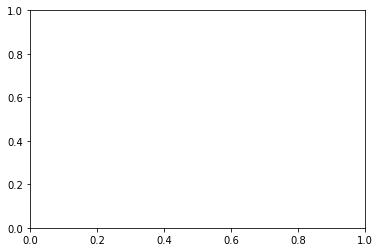

In [114]:
# plt.plot(Ts, gamma1s, label='First Order Model')
print(len(Ds))
print(len(Ds_gamma2s))
plt.plot(Ds, Ds_gamma2s, label='Second Order Model')

plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel(r'density $(1/m^2)$')
y = Ds_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("damping coefficient_density.jpg")

In [ ]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_Ds = np.log(np.array(Ds))
log_Ds_gamma2s = np.log(np.array(Ds_terminal_vs))
plt.plot(log_Ds, log_Ds_gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("log damping coefficient")
plt.xlabel(r'log density $(1/m^2)$')
y = log_Ds_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log damping coefficient_density.jpg")

In [ ]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(Ds, Ds_terminal_vs)
plt.ylabel(r'terminal velocity $(m/s)$')
plt.xlabel(r'density $(1/m^2)$')
y = Ds_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("terminal_velocity_density.jpg")

In [ ]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_Ds = np.log(np.array(Ds))
log_Ds_terminal_vs = np.log(np.array(Ds_terminal_vs))
plt.plot(log_Ds, log_Ds_terminal_vs)
plt.ylabel(r'log terminal velocity $(m/s)$')
plt.xlabel(r'log density $(1/m^2)$')
y = log_Ds_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log terminal_velocity_density.jpg")

## Mass Ratios

In [115]:
MRs_gamma1s = [] 
MRs_gamma2s = []
MRs_terminal_vs = []

MRs = list(map(lambda x : x,  range( 1, 100)))
for MR in MRs :
    print(MR)
    [g1, g2, terminal_v] = compare_models('result_MR', 'MR', MR)
    print(g1)
    print(g2)
    MRs_gamma1s.append(g1)
    MRs_gamma2s.append(g2)
    MRs_terminal_vs.append(terminal_v)

# plt.plot(MRs, gamma1s, label='First Order Model')
# plt.plot(MRs, gamma2s, label='Second Order Model')
# plt.legend()
# plt.ylabel("damping coefficient")
# plt.xlabel("Mass Ratio")

1
number_of_logs :  84
damping factor gamma in the first order situation : 0.543246340308182
damping factor gamma in the second order situation : 0.029511658625823306
The Mean Square Root Error of First Order Model : 31.63649788970746
The Mean Square Root Error of Second Order Model : 31.63606870178955
The second order model is more fitter than the first order model
0.543246340308182
0.029511658625823306
2
number_of_logs :  87
damping factor gamma in the first order situation : 0.3480873472693488
damping factor gamma in the second order situation : 0.012116480132901225
The Mean Square Root Error of First Order Model : 25.28604716402682
The Mean Square Root Error of Second Order Model : 25.282314680217674
The second order model is more fitter than the first order model
0.3480873472693488
0.012116480132901225
3
number_of_logs :  89
damping factor gamma in the first order situation : 0.25448798757124874
damping factor gamma in the second order situation : 0.006476413581806407
The Mean Squ

number_of_logs :  88
damping factor gamma in the first order situation : 0.0829080866799822
damping factor gamma in the second order situation : 0.0006873750836935443
The Mean Square Root Error of First Order Model : 16.355683370344003
The Mean Square Root Error of Second Order Model : 15.318953503828237
The second order model is more fitter than the first order model
0.0829080866799822
0.0006873750836935443
22
number_of_logs :  85
damping factor gamma in the first order situation : 0.07969655246611748
damping factor gamma in the second order situation : 0.0006351540474984615
The Mean Square Root Error of First Order Model : 15.505763184484104
The Mean Square Root Error of Second Order Model : 14.881785823026737
The second order model is more fitter than the first order model
0.07969655246611748
0.0006351540474984615
23
number_of_logs :  87
damping factor gamma in the first order situation : 0.07535542227983276
damping factor gamma in the second order situation : 0.0005678439666971915


number_of_logs :  82
damping factor gamma in the first order situation : 0.054947450640307136
damping factor gamma in the second order situation : 0.00030192223318689887
The Mean Square Root Error of First Order Model : 16.257941805312637
The Mean Square Root Error of Second Order Model : 14.044871633000563
The second order model is more fitter than the first order model
0.054947450640307136
0.00030192223318689887
42
number_of_logs :  82
damping factor gamma in the first order situation : 0.05327271217024087
damping factor gamma in the second order situation : 0.000283798186197333
The Mean Square Root Error of First Order Model : 15.61884234653608
The Mean Square Root Error of Second Order Model : 14.462220557553952
The second order model is more fitter than the first order model
0.05327271217024087
0.000283798186197333
43
number_of_logs :  82
damping factor gamma in the first order situation : 0.0535760498250513
damping factor gamma in the second order situation : 0.000287039311485637

number_of_logs :  83
damping factor gamma in the first order situation : 0.043114369453197826
damping factor gamma in the second order situation : 0.0001858848853346838
The Mean Square Root Error of First Order Model : 17.360333695678328
The Mean Square Root Error of Second Order Model : 14.058094276735662
The second order model is more fitter than the first order model
0.043114369453197826
0.0001858848853346838
62
number_of_logs :  81
damping factor gamma in the first order situation : 0.04323644049323496
damping factor gamma in the second order situation : 0.00018693897865250478
The Mean Square Root Error of First Order Model : 18.57994373890628
The Mean Square Root Error of Second Order Model : 14.336535056575132
The second order model is more fitter than the first order model
0.04323644049323496
0.00018693897865250478
63
number_of_logs :  83
damping factor gamma in the first order situation : 0.04303117455284138
damping factor gamma in the second order situation : 0.000185168198339

number_of_logs :  83
damping factor gamma in the first order situation : 0.03735129502825818
damping factor gamma in the second order situation : 0.0001395119240287984
The Mean Square Root Error of First Order Model : 20.83212741650502
The Mean Square Root Error of Second Order Model : 14.292341294801417
The second order model is more fitter than the first order model
0.03735129502825818
0.0001395119240287984
82
number_of_logs :  85
damping factor gamma in the first order situation : 0.03658012344998288
damping factor gamma in the second order situation : 0.00013381054316159875
The Mean Square Root Error of First Order Model : 20.874562864998843
The Mean Square Root Error of Second Order Model : 14.896303662042593
The second order model is more fitter than the first order model
0.03658012344998288
0.00013381054316159875
83
number_of_logs :  83
damping factor gamma in the first order situation : 0.03646009016140808
damping factor gamma in the second order situation : 0.00013293381745780

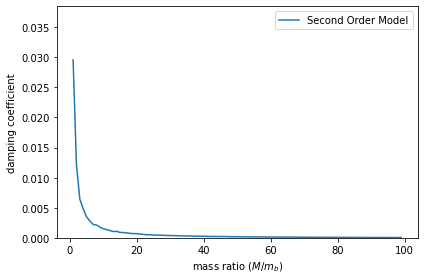

In [116]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(MRs, MRs_gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel(r'mass ratio $(M/m_b)$')
y = MRs_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("damping_coefficient_mass.jpg")

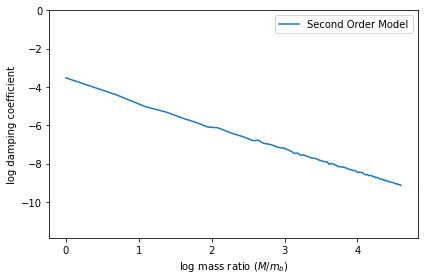

In [117]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_MRs = np.log(np.array(MRs))
log_MRs_gamma2s = np.log(np.array(MRs_gamma2s))
plt.plot(log_MRs, log_MRs_gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("log damping coefficient")
plt.xlabel(r'log mass ratio $(M/m_b)$')
y = log_MRs_gamma2s
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log_damping_coefficient_mass.jpg")

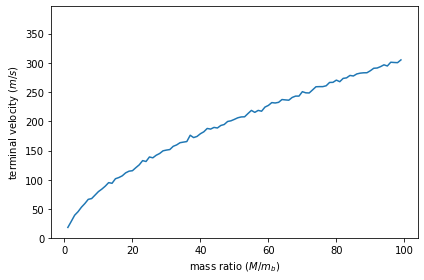

In [118]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(MRs, MRs_terminal_vs)
plt.ylabel(r'terminal velocity $(m/s)$')
plt.xlabel(r'mass ratio $(M/m_b)$')
y = MRs_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("terminal_velocity_mass.jpg")

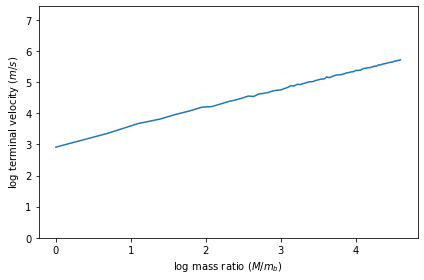

In [119]:
# plt.plot(Ts, gamma1s, label='First Order Model')
log_MRs = np.log(np.array(MRs))
log_MRs_terminal_vs = np.log(np.array(MRs_terminal_vs))
plt.plot(log_MRs, log_MRs_terminal_vs)
plt.ylabel(r'log terminal velocity $(m/s)$')
plt.xlabel(r'log mass ratio $(M/m_b)$')
y = log_MRs_terminal_vs
if max(y) > 0 :
    if min(y) > 0 :
        plt.ylim(0, max(y)*1.3)
    else :
        plt.ylim(min(y), max(y))
else : 
    plt.ylim(min(y)*1.3, 0)
plt.tight_layout()
plt.savefig("log_terminal_velocity_mass.jpg")